# Final Project 1
---
## Latar Belakang
Salah satu bidang terpenting dalam statistik dan Machine Learning adalah analisis regresi. Dalam regresi sendiri memiliki beragam jenis, salah satunya adalah Regresi Linier yang akan dipakai pada project kali ini. Regresi Linier sendiri biasa digunakan untuk membentuk model hubungan antara variabek dependen (Y) dengan variabel independen (X). Pendekatan ini juga dapat digunakan untuk meramalkan data yang diperlukan guna menentukan korelasi linier antar variabel. Pada project kali ini akan menganalisis terkait tarif jasa transformasi.

Pada data memiliki 2 jenis layanan transformasi online yang paling banyak digunakan di NY yaitu Uber dan Lyft. 

Dalam project ini akan melakukan prediksi harga berdasarkan  faktor cuaca, hari dalam seminggu, jarak, dll. Guna membantu penduduk dalam memilih transportasi online terbaik dengan biaya terendah.

---

Kelompok: <br>
<ol>
<li>Immantaka Juniarsa</li>
<li>Widawati Annisa Putri</li>
<li>Muhammad Farhan Atsar Ghiffari</li>
</ol>


Objectives/goal:
- Untuk memahami faktor-faktor yang mempengaruhi tarif transportasi online dan memprediksinya.
- menentukan algoritma apa yang terbaik untuk memprediksi harga jasa transportasi online.

Sumber Dataset: <br>
<center><a src="https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma">Uber and Lyft Dataset Boston, MA</a>

## Library
---

In [1]:
# for data
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

# for encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# for splitting data
from sklearn.model_selection import train_test_split

# building model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# MSE
from sklearn.metrics import mean_squared_error




## Data Loading
---

### read data

In [2]:
df = pd.read_csv('./Datasets/rideshare_kaggle.csv', sep=',')

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### dimensi dataset

In [4]:
df.shape

(693071, 57)

### Informasi dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Nilai unique data

In [6]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

## Data Cleaning
---

In [7]:
# mengecek missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dapat terlihat bahwa dikolom price memiliki 55095 missing value, maka perlu dilakukan filling pada kolom yang mengandung missing values.

In [8]:
# menghapus nilai yang kosong
df = df.dropna(subset=['price']).reset_index()

In [9]:
# melihat duplikasi data
df.duplicated().sum()

0

In [10]:
# Mengambil fitur-fitur yang akan digunakan untuk permodelan dan menyimpannya dalam variabel baru
kolom = [
    "cab_type", 
    "name", 
    "hour", 
    "day",
    "month",
    "source", 
    "destination", 
    "price", 
    "distance", 
    "short_summary",
    "temperature",
    "surge_multiplier"
]

data = df[kolom]

In [11]:
data.head()

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,1.0


In [12]:
data.tail()

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,surge_multiplier
637971,Uber,WAV,23,1,12,West End,North End,9.5,1.0,Partly Cloudy,37.05,1.0
637972,Uber,UberXL,23,1,12,West End,North End,13.0,1.0,Partly Cloudy,37.05,1.0
637973,Uber,UberX,23,1,12,West End,North End,9.5,1.0,Partly Cloudy,37.05,1.0
637974,Uber,Black SUV,23,1,12,West End,North End,27.0,1.0,Partly Cloudy,37.05,1.0
637975,Uber,UberPool,23,1,12,West End,North End,10.0,1.0,Partly Cloudy,37.05,1.0


**Keterangan**

Dari jumlah kolom yang ada diambil beberapa kolom yang diperlukan oleh case project ini, diantaranya:

*   cab_type : jenis kendaraan yang dipesan ,
*   name : nama produk,
*   hour : jam pemesanan,
*   day : hari pemesanan,
*   month : bulan pemesanan,
*   source : lokasi awal pelanggan,
*   destination : lokasi tujuan pelanggan,
*   price : harga,
*   distance : jarak tempuh,
*   short_summary : ringkasan cuaca,
*   temperature : suhu,
*   surge_multiplier : faktor pengali harga

In [13]:
# Mengecek jenis cuaca 
print(data["short_summary"].value_counts())

 Overcast             201429
 Mostly Cloudy        134603
 Partly Cloudy        117226
 Clear                 80256
 Light Rain            50488
 Rain                  21781
 Possible Drizzle      17176
 Foggy                  8292
 Drizzle                6725
Name: short_summary, dtype: int64


In [14]:
# Membuat variabel baru data_copy untuk menampung nilai dari data
data_copy = data.copy()

# Melihat data data_copy
data_copy

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
637971,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,1.0
637972,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,37.05,1.0
637973,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,1.0
637974,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,37.05,1.0


In [15]:
# Membuat Fungsi Rute
def rate(data_copy):
    # Jika Cuaca Overcast
    if data_copy["short_summary"] == " Overcast ":
        hasil = round((data_copy["price"]/data_copy["distance"])*1.5, 2)
    # Jika Cuaca Mostly Cloudy
    elif data_copy["short_summary"] == " Mostly Cloudy ":
        hasil = round((data_copy["price"]/data_copy["distance"])*2, 2)
    # Jika Cuaca Partly Cloudy
    elif data_copy["short_summary"] == " Partly Cloudy ":
        hasil = round((data_copy["price"]/data_copy["distance"])*1.5, 2)
    # Jika Cuaca Light Rain
    elif data_copy["short_summary"] == " Light Rain ":
        hasil = round((data_copy["price"]/data_copy["distance"])*2.5, 2)
    # Jika Cuaca Rain
    elif data_copy["short_summary"] == " Rain ":
        hasil = round((data_copy["price"]/data_copy["distance"])*3, 2)
    # Jika Cuaca Possible Drizzle
    elif data_copy["short_summary"] == " Possible Drizzle ":
        hasil = round((data_copy["price"]/data_copy["distance"])*2, 2)
    # Jika Cuaca Foggy
    elif data_copy["short_summary"] == " Foggy ":
        hasil = round((data_copy["price"]/data_copy["distance"])*2, 2)
    # Jika Cuaca Drizzle
    elif data_copy["short_summary"] == " Drizzle ":
        hasil = round((data_copy["price"]/data_copy["distance"])*2.5, 2)
    # Jika Cuaca Clear
    else:
        hasil = round(data_copy["price"]/data_copy["distance"], 2)
    return hasil

data_copy["rate"] = data_copy.apply(rate, axis=1)


In [16]:
# Melihat data data_copy
data_copy

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,surge_multiplier,rate
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,1.0,22.73
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,1.0,75.00
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,1.0,15.91
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,1.0,59.09
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,1.0,30.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,1.0,14.25
637972,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,37.05,1.0,19.50
637973,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,1.0,14.25
637974,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,37.05,1.0,40.50


**Keterangan**

Tarif (rate):

1. Overcast = 1,5
2. Mostly Cloudy = 2
3. Partly Cloudy = 1,5
4. Clear = 1
5. Light Rain = 2,5
6. Rain = 3
7. Possible Drizzle = 2
8. Foggy = 2
9. Drizzle = 2,5

## Exploratory Data
---

c:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


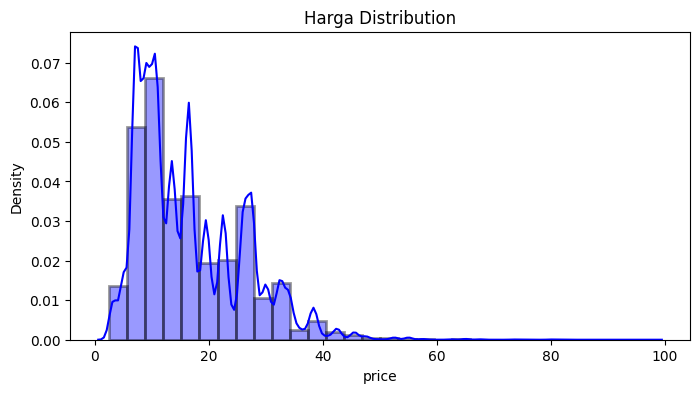

In [17]:
plt.figure(figsize=[8,4])
sns.distplot(data['price'], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Harga Distribution')
plt.show()

c:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


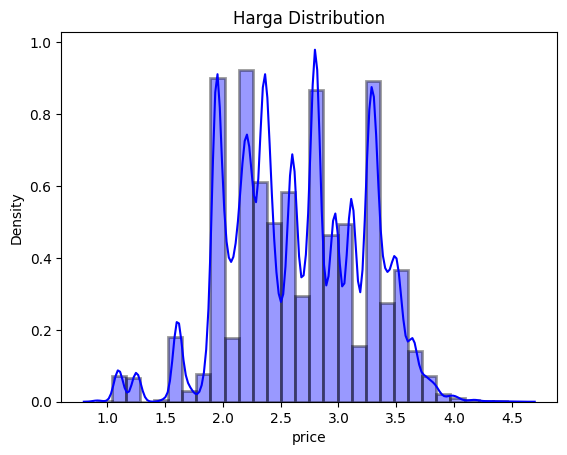

In [18]:
# menggunakan numpy log untuk mengurangi skewness
plt.Figure(figsize=[8,4])
sns.distplot(np.log(data['price']), color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Harga Distribution')
plt.show()

mengubah data price yang sebelumnya skew positif menjadi normal dengan menggunakan numpy log

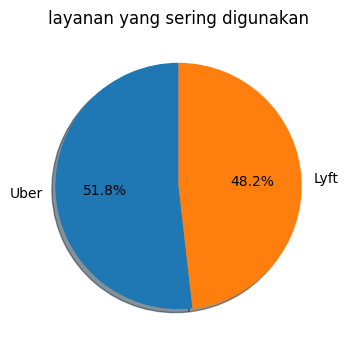

In [19]:
plt.figure(figsize=[8,4])
plt.pie(data['cab_type'].value_counts(), labels=df['cab_type'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('layanan yang sering digunakan')
plt.show()

<center>dapat dilihat bahwa customer lebih banyak menggunakan uber daripada lyft 

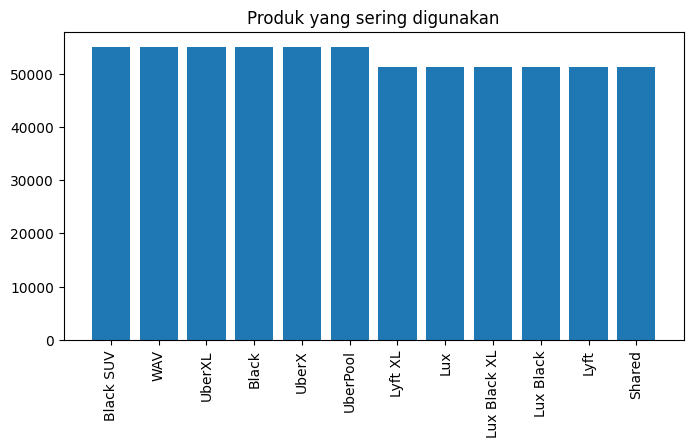

In [20]:
# visualisasi produk yang sering digunakan
plt.figure(figsize=[8,4])
plt.bar(data['name'].value_counts().index, df['name'].value_counts())
plt.xticks(rotation=90)
plt.title('Produk yang sering digunakan')
plt.show()

<center> dapat dilihat bahwa customer lebih sering menggunakan produk dari uber dibandingkan dengan produk dari lyft.

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


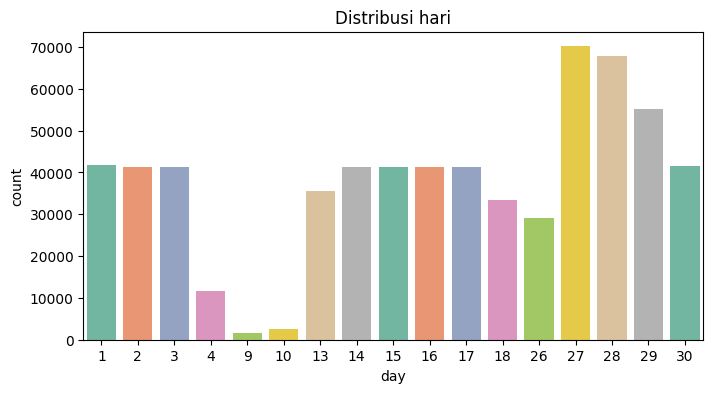

In [21]:
# visualisasi berdasarkan hari menggunakan seaborn
plt.figure(figsize=[8,4])
sns.countplot(data['day'], palette='Set2')
plt.title('Distribusi hari')
plt.show()

dapat dilihat bahwa customer lebih sering menggunakan jasa layanan di akhir bulan pada tanggal 27 sampai 30.

<Axes: >

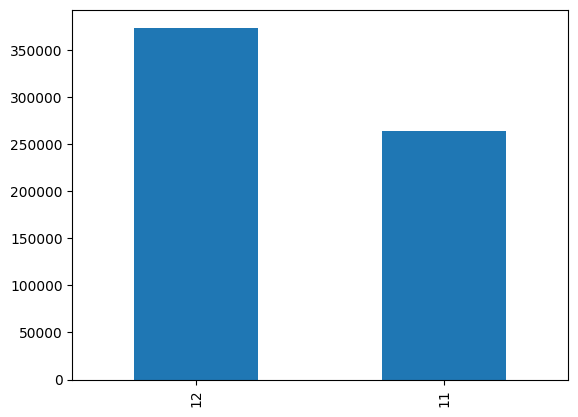

In [22]:
# melihat value yang terdapat pada kolom month
df['month'].value_counts().plot(kind='bar')

Berdasarkan hasil dapat dilihat bahwa data month hanya memiliki fitur November dan Desember. Dengan kata lain, data ini diambil pada bulan November dan Desember saja. dan dapat dilihat di bulan desertember, jumlah pemesanan lebih banyak dibandingkan dengan bulan November.

## Data Preprocessing
---

In [23]:
# menambahkan kolom baru untuk price logaritma
data['log_price'] = np.log(data['price'])

C:\Users\hp\AppData\Local\Temp\ipykernel_1684\814301448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = np.log(data['price'])


In [24]:
data.head()

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,surge_multiplier,log_price
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,1.0,1.609438
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,1.0,2.397895
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,1.0,1.945910
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,1.0,3.258097
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,1.0,2.197225


Menambahkan log price pada data supaya data lebih normal

### Feature Selection

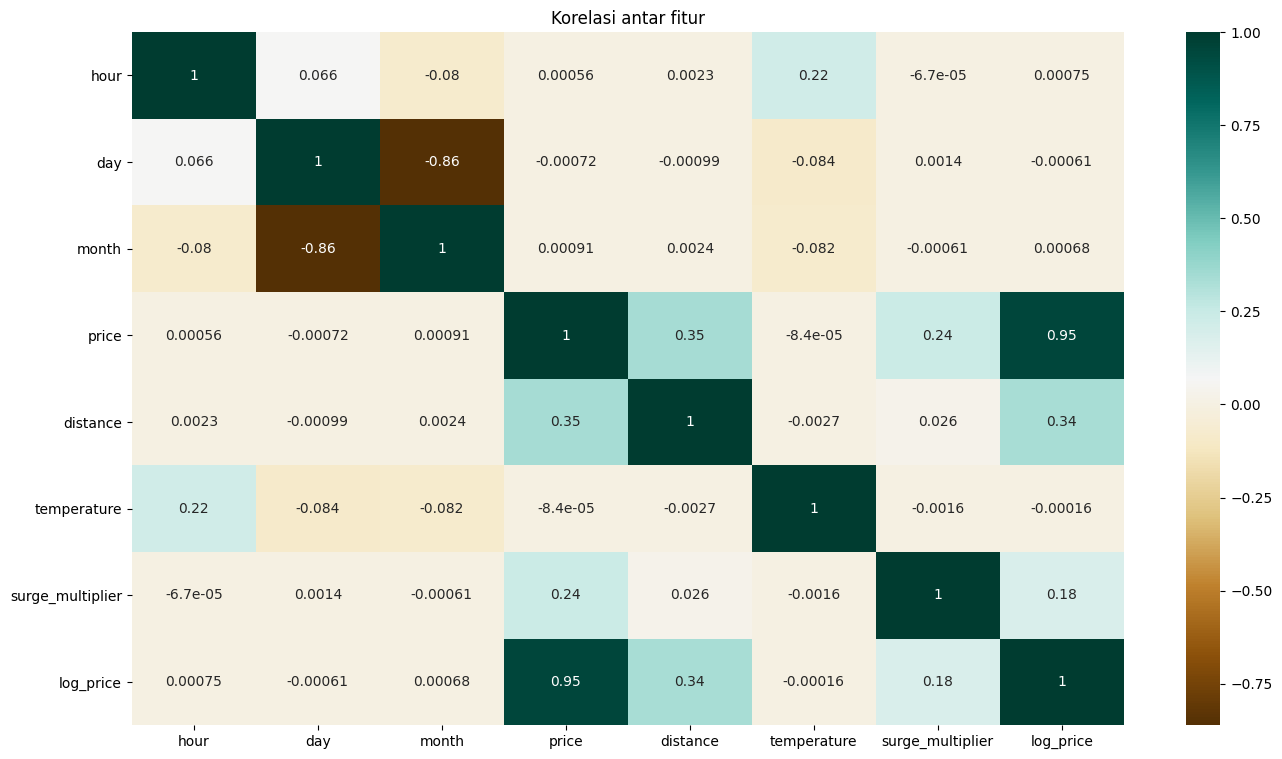

In [25]:
plt.figure(figsize=[16,9])
sns.heatmap(data.corr(), annot=True, cmap='BrBG')
plt.title('Korelasi antar fitur')
plt.show()

Terlihat dari matrix korelasi bahwa terdapat beberapa fitur yang memiliki korelasi dengan fitur price, seperti fitur distance dan surge_multiplier.

In [26]:
data = data.drop(['day', 'month','name'], axis=1)

### Encoding

In [27]:
# encoding data menggunakan one hot encoding
data1 = pd.get_dummies(data, columns=['cab_type', 'source', 'destination', 'short_summary'])

In [28]:
data1.head()

,hour,price,distance,temperature,surge_multiplier,log_price,cab_type_Lyft,cab_type_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,9,5.0,0.44,42.34,1.0,1.609438,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,11.0,0.44,43.58,1.0,2.397895,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,7.0,0.44,38.33,1.0,1.945910,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,26.0,0.44,34.38,1.0,3.258097,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3,9.0,0.44,37.44,1.0,2.197225,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
# memisahkan fitur dan label
# memilih fitur X yang sudah di encode
X = data1.iloc[:, 6:]
y = data1['log_price']

In [30]:
X.head()

,cab_type_Lyft,cab_type_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
y.head()

0    1.609438
1    2.397895
2    1.945910
3    3.258097
4    2.197225
Name: log_price, dtype: float64

### train test split

In [32]:
# membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [33]:
# Standarisasi fitur dengan menggunakan StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

### Linear Regression

In [34]:
# membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# membuat prediksi
y_pred_lr = model.predict(X_test)

In [36]:
# menampilkan hasil prediksi
result_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
result_lr.head()


,Actual,Predicted
450745,2.602690,2.556095
267504,2.602690,2.832725
552133,2.014903,2.462520
568194,2.639057,2.587530
547009,2.079442,2.694368


In [37]:
# melihat score dari model
model.score(X_test, y_test)

0.04545027271026847

In [38]:
# menghitung R^2
from sklearn.metrics import r2_score

# Prediksi 
score = r2_score(y_test,y_pred_lr)
print('nilai R^2 : ', score)
print('nilai MSE : ', mean_squared_error(y_test, y_pred_lr))
print('nilai RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

nilai R^2 :  0.04545027271026847
nilai MSE :  0.3072091941915191
nilai RMSE :  0.5542645525302147


In [39]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     877.3
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:26:21   Log-Likelihood:            -5.3026e+05
No. Observations:              637976   AIC:                         1.061e+06
Df Residuals:                  637940   BIC:                         1.061e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [40]:
#train_dataset = data1.sample(frac=0.8, random_state=0)
#sns.pairplot(train_dataset,diag_kind='kde')

### Lasso Regression

In [41]:
# membuat model lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [42]:
# membuat prediksi
y_pred_lasso = lasso.predict(X_test)

In [43]:
# menampilkan hasil prediksi
result_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
result_lasso.head()

,Actual,Predicted
450745,2.602690,2.64977
267504,2.602690,2.64977
552133,2.014903,2.64977
568194,2.639057,2.64977
547009,2.079442,2.64977


In [44]:
# melihat score dari model menggunakan R^2, MSE, RMSE
score_lasso = r2_score(y_test,y_pred_lasso)
print('nilai R^2 : ', score)
print('nilai MSE : ', mean_squared_error(y_test, y_pred_lasso))
print('nilai RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

nilai R^2 :  0.04545027271026847
nilai MSE :  0.32183676810899836
nilai RMSE :  0.5673065909268095


### Ridge Regression

In [45]:
# membuat model ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [46]:
# membuat prediksi
y_pred_ridge = ridge.predict(X_test)

In [47]:
# menampilkan hasil prediksi
result_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
result_ridge.head()

,Actual,Predicted
450745,2.602690,2.555245
267504,2.602690,2.834125
552133,2.014903,2.460824
568194,2.639057,2.586432
547009,2.079442,2.691112


In [48]:
# melihat score dari model menggunakan MSE
score_ridge = r2_score(y_test,y_pred_ridge)
print('nilai R^2 : ', score)
print('nilai MSE : ', mean_squared_error(y_test, y_pred_ridge))
print('nilai RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

nilai R^2 :  0.04545027271026847
nilai MSE :  0.30721211221295214
nilai RMSE :  0.5542671848602911


dapat dilihat bahwa di dalam tabel prediksi, tidak terlalu berbeda jauh dengan kolom masing - masing predicted.

## Menentukan Model Terbaik

In [49]:
# menentukan model terbaik menggunakan R^2
print('R^2 Linear Regression: ',r2_score(y_test, y_pred_lr))
print('R^2 Lasso Regression: ', r2_score(y_test, y_pred_lasso))
print('R^2 Ridge Regression: ', r2_score(y_test, y_pred_ridge))

R^2 Linear Regression:  0.04545027271026847
R^2 Lasso Regression:  -1.6401637603635777e-08
R^2 Ridge Regression:  0.04544120593552403


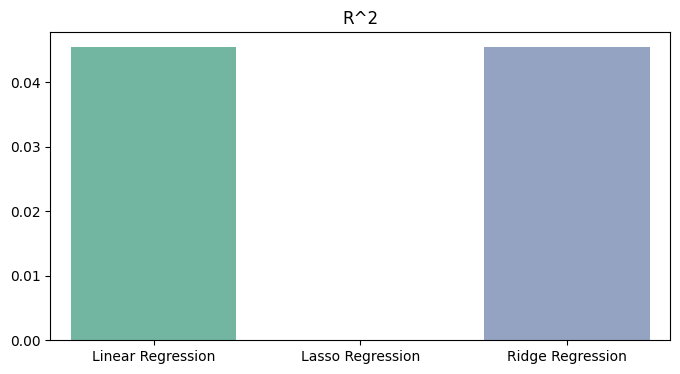

In [50]:
# visualisasi model terbaik menggunakanan R^2 seaborn dengan mengurutkan dari yang terkecil ke terbesar
plt.figure(figsize=[8,4])
sns.barplot(x=['Linear Regression', 'Lasso Regression', 'Ridge Regression'], y=[r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_ridge)], palette='Set2')
plt.title('R^2')
plt.show()

terlihat bahwa model terbaik adalah model linear regression dengan menggunakan R^2 dengan score 0.17860430678999129.

In [51]:
# menentukan model terbaik menggunakan MSE
print('MSE Linear Regression: ', mean_squared_error(y_test, y_pred_lr))
print('MSE Lasso Regression: ', mean_squared_error(y_test, y_pred_lasso))
print('MSE Ridge Regression: ', mean_squared_error(y_test, y_pred_ridge))

MSE Linear Regression:  0.3072091941915191
MSE Lasso Regression:  0.32183676810899836
MSE Ridge Regression:  0.30721211221295214


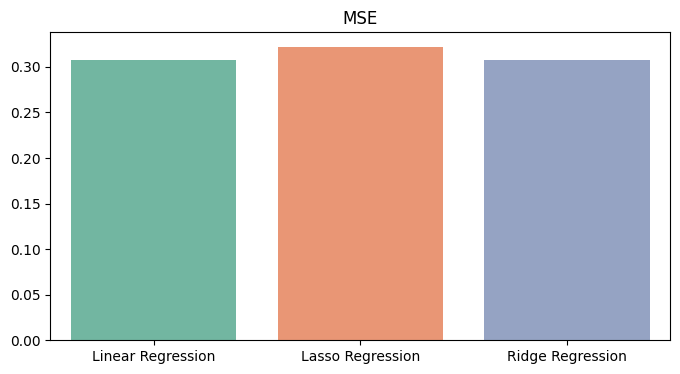

In [52]:
# visualisasi model terbaik menggunakanan MSE seaborn dengan mengurutkan dari yang terkecil ke terbesar
plt.figure(figsize=[8,4])
sns.barplot(x=['Linear Regression', 'Lasso Regression', 'Ridge Regression'], y=[mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_lasso), mean_squared_error(y_test, y_pred_ridge)], palette='Set2')
plt.title('MSE')
plt.show()

terlihat bahwa model terbaik adalah model linear regression dengan menggunakan MSE dengan score 71.84573774952223.

In [53]:
# menentukan model terbaik menggunakan RMSE
print('RMSE Linear Regression: ', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('RMSE Lasso Regression: ', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('RMSE Ridge Regression: ', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

RMSE Linear Regression:  0.5542645525302147
RMSE Lasso Regression:  0.5673065909268095
RMSE Ridge Regression:  0.5542671848602911


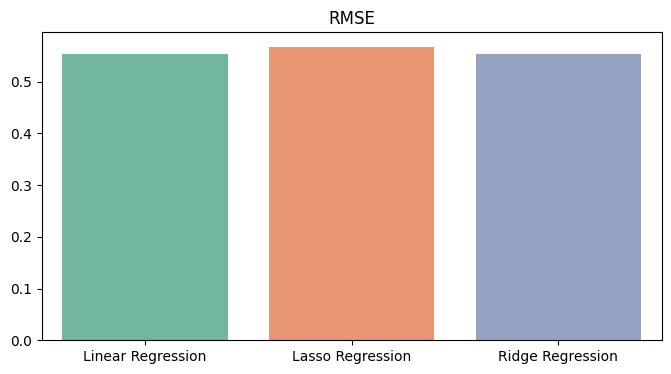

In [54]:
# visualisasi model terbaik menggunakanan RMSE seaborn dengan mengurutkan dari yang terkecil ke terbesar
plt.figure(figsize=[8,4])
sns.barplot(x=['Linear Regression', 'Lasso Regression', 'Ridge Regression'], y=[np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_lasso)), np.sqrt(mean_squared_error(y_test, y_pred_ridge))], palette='Set2')
plt.title('RMSE')
plt.show()